# Importing required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
import pandas as pd
data=pd.read_csv('Covid19_us.csv')
df=pd.DataFrame(data)
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df.shape

(58, 18)

In [4]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [5]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

# EDA Process

In [69]:
df.describe()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000
mean,27.00000,37.769382,-83.662516,28212.745455,1698.836364,5351.127273,21162.781818,403.435002,2.299576e+05,4638.490909,4.567409,3960.938317,14.342541
std,16.02082,8.453768,48.840127,53614.101223,4178.550115,10607.048455,42148.607793,402.735419,2.999399e+05,10769.258408,2.074273,1884.729897,3.885493
min,0.00000,13.444300,-157.498300,21.000000,2.000000,0.000000,2.000000,38.082112,1.383000e+03,3.000000,1.101269,97.702058,6.778043
25%,13.50000,34.905100,-99.611400,3834.500000,98.500000,37.000000,1076.000000,158.533760,4.859600e+04,397.000000,3.256718,2752.080259,12.726003
50%,27.00000,39.063900,-86.902300,11528.000000,407.000000,1275.000000,6324.000000,251.824349,1.422460e+05,1515.000000,4.415327,3492.893832,14.342541
75%,40.50000,42.493100,-76.914450,31172.000000,1561.500000,4473.000000,19810.500000,483.617754,2.817865e+05,5131.500000,5.508969,4863.746497,15.811886
max,54.00000,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


There is so much differences between 75% and max value in mostly all columns. Some Outliers are present.

Mean and Median difference are also so high. Skewness is present.

# Checking Null Values

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.isnull()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
9,False,False,False,True,True,False,False,True,False,False,True,True,True,False,False,False,True,True


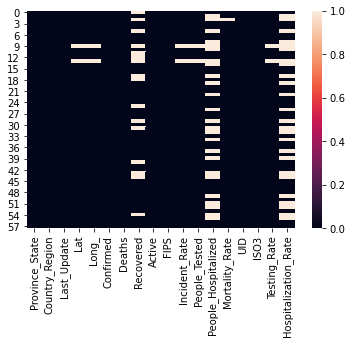

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

There are so much null values.

In [11]:
c1=df['Confirmed']!=0    #confirmed cases are taken into account for model training
df=df[c1]
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN


In [12]:
df[df.isna().any(axis=1)]     #showing all NaN value rows

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,NaN,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911
12,Georgia,US,2020-05-21 02:32:54,33.0406,-83.6431,39801,1697,NaN,38104.0,13,374.864974,402940.0,7107.0,4.263712,84000013,USA,3795.082856,17.856335
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN


In [13]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               15
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     24
Mortality_Rate           0
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    24
dtype: int64

# Replacing Null Values

In [14]:
for col in ['Recovered']:
    df[col].fillna(value=df['Confirmed']-df['Active']-df['Deaths'],inplace=True)
    
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN


In [15]:
for col in ['Hospitalization_Rate']:
    df[col].fillna(value=df['Hospitalization_Rate'].mean(),inplace=True)
    
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,14.342541
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,14.342541
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,14.342541
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,14.342541


In [16]:
for col in ['People_Hospitalized']:
    df[col].fillna(value=df['Confirmed']*df['Hospitalization_Rate']*0.01,inplace=True)
    
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,57.513591,2.493766,84000002,USA,5063.940017,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,12334.155357,4.066421,84000006,USA,3492.893832,14.342541
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.000000,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,1175.227845,3.783256,84000010,USA,4663.552976,14.342541
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,7.027845,0.000000,84088888,USA,NaN,14.342541
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,1083.005304,5.390015,84000011,USA,5727.106946,14.342541


In [17]:
df['People_Hospitalized']=df['People_Hospitalized'].astype(int)
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,57,2.493766,84000002,USA,5063.940017,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,12334,4.066421,84000006,USA,3492.893832,14.342541
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,1175,3.783256,84000010,USA,4663.552976,14.342541
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,7,0.000000,84088888,USA,NaN,14.342541
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,1083,5.390015,84000011,USA,5727.106946,14.342541


In [18]:
#Row no. 9 and 13 are cruise ships of US.They are taken into account as thisdataset is for states of US.
df.drop([9,13],axis=0,inplace=True)    

In [19]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,57,2.493766,84000002,USA,5063.940017,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,12334,4.066421,84000006,USA,3492.893832,14.342541
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,1175,3.783256,84000010,USA,4663.552976,14.342541
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,1083,5.390015,84000011,USA,5727.106946,14.342541
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,0.0,45375.0,12,221.024217,771348.0,8934,4.415327,84000012,USA,3591.383953,18.819911


In [20]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

Now, There is no null values.

In [21]:
#dropping these ID type columns and Last_Update is unique date.
df.drop(['Country_Region','Last_Update','FIPS','UID','ISO3'],axis=1,inplace=True)
df

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,0.0,12530.0,266.194321,164450.0,1493,3.999387,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,54.815493,37045.0,57,2.493766,5063.940017,14.342541
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792,5.011405,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535,2.138717,3189.670370,10.693584
5,California,36.1162,-119.6816,85997,3497,0.0,82500.0,217.646575,1380120.0,12334,4.066421,3492.893832,14.342541
6,Colorado,39.0598,-105.3111,22797,1299,3478.0,18020.0,395.868121,131837.0,3955,5.698118,2289.339188,17.348774
7,Connecticut,41.5978,-72.7554,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946,9.044775,5349.302875,28.054438
8,Delaware,39.3185,-75.5071,8194,310,3965.0,3919.0,841.476990,45412.0,1175,3.783256,4663.552976,14.342541
10,District of Columbia,38.8974,-77.0268,7551,407,1059.0,6085.0,1069.927127,40419.0,1083,5.390015,5727.106946,14.342541
11,Florida,27.7663,-81.6868,47471,2096,0.0,45375.0,221.024217,771348.0,8934,4.415327,3591.383953,18.819911


In [22]:
df.shape

(55, 13)

# Data Visualization

# Bivariate Analysis

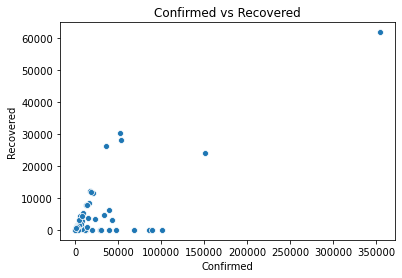

In [27]:
sns.scatterplot(x=df['Confirmed'],y=df['Recovered'],data=df)
plt.title('Confirmed vs Recovered')
plt.show()

Observation:

Confirmed cases and recovered cases are linearly correlated.

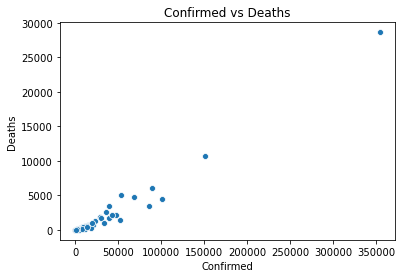

In [28]:
sns.scatterplot(x=df['Confirmed'],y=df['Deaths'],data=df)
plt.title('Confirmed vs Deaths')
plt.show()

Observation:

Confirmed cases and Death cases are linearly correlated.

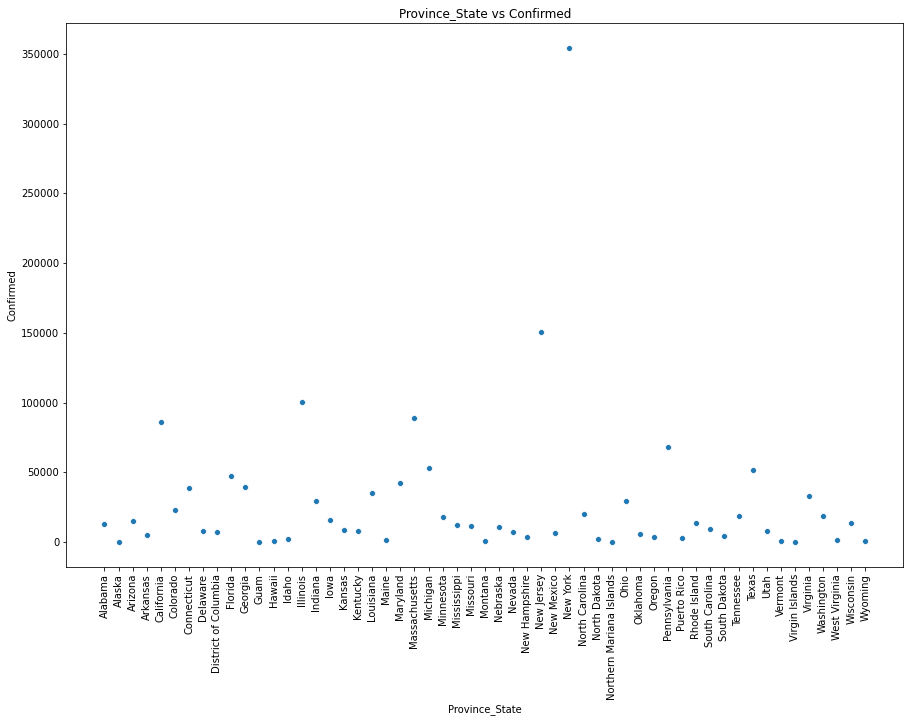

In [31]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=df['Province_State'],y=df['Confirmed'],data=df)
plt.title('Province_State vs Confirmed')
plt.show()

Observation:

New York has highest number of confirmed cases.

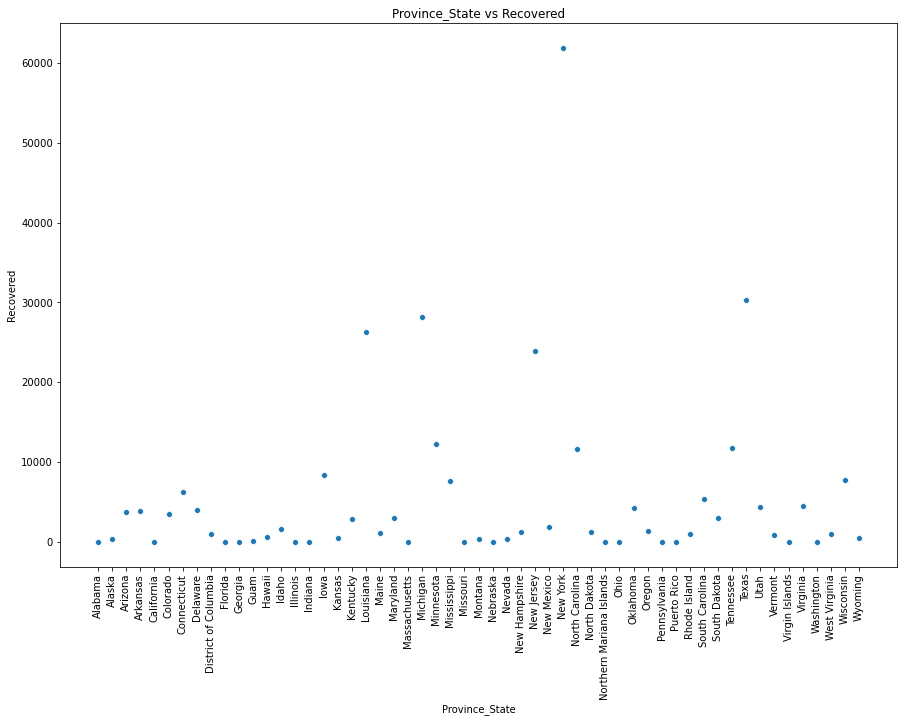

In [33]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=df['Province_State'],y=df['Recovered'],data=df)
plt.title('Province_State vs Recovered')
plt.show()

Observation:

New York has highest number of Recovered cases.

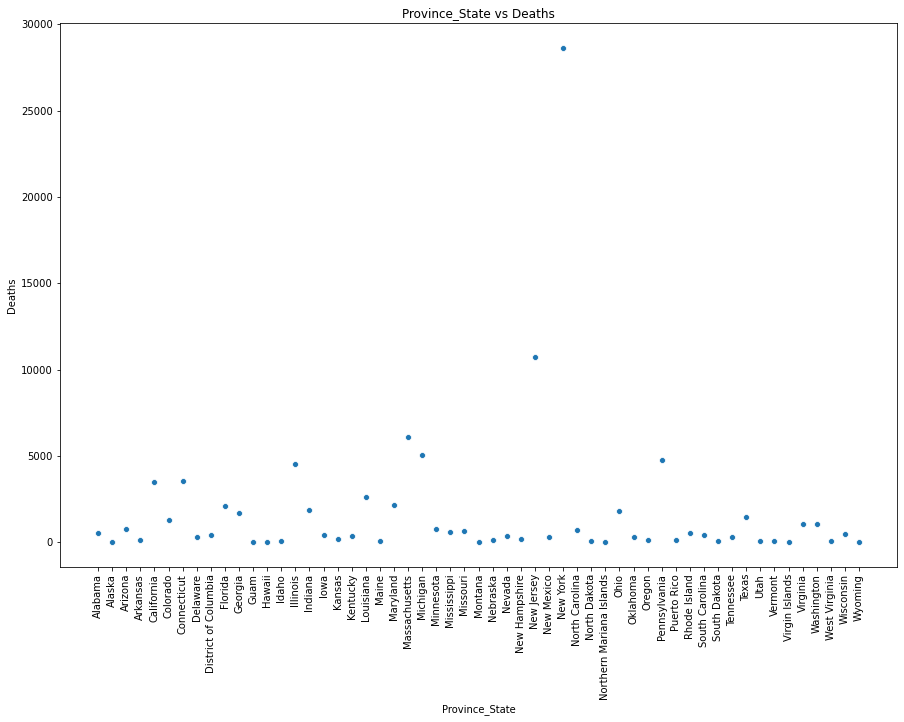

In [35]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot(x=df['Province_State'],y=df['Deaths'],data=df)
plt.title('Province_State vs Deaths')
plt.show()

Observation:

New York has highest number of deaths.

# Label Encoding

The only object type data is Province_State. Let's encode it to numeric.

In [36]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Province_State']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [37]:
df

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,0.0,12530.0,266.194321,164450.0,1493,3.999387,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.0,39.0,54.815493,37045.0,57,2.493766,5063.940017,14.342541
3,2,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792,5.011405,2272.859351,12.022005
4,3,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535,2.138717,3189.670370,10.693584
5,4,36.1162,-119.6816,85997,3497,0.0,82500.0,217.646575,1380120.0,12334,4.066421,3492.893832,14.342541
6,5,39.0598,-105.3111,22797,1299,3478.0,18020.0,395.868121,131837.0,3955,5.698118,2289.339188,17.348774
7,6,41.5978,-72.7554,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946,9.044775,5349.302875,28.054438
8,7,39.3185,-75.5071,8194,310,3965.0,3919.0,841.476990,45412.0,1175,3.783256,4663.552976,14.342541
10,8,38.8974,-77.0268,7551,407,1059.0,6085.0,1069.927127,40419.0,1083,5.390015,5727.106946,14.342541
11,9,27.7663,-81.6868,47471,2096,0.0,45375.0,221.024217,771348.0,8934,4.415327,3591.383953,18.819911


# Multivariate Analysis

# Correlation

In [38]:
df_corr=df.corr()
df_corr

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.028758,0.035615,-0.032548,-0.015341,0.105628,-0.066463,-0.116961,-0.091367,-0.022613,-0.045473,0.029655,-0.136436
Lat,0.028758,1.000000,-0.570065,0.098689,0.110710,0.056667,0.100299,0.210072,0.024969,0.088680,-0.189675,0.194446,-0.086111
Long_,0.035615,-0.570065,1.000000,-0.006640,0.016533,-0.023550,-0.004159,0.010608,-0.105068,0.004656,0.318569,0.138546,0.073388
Confirmed,-0.032548,0.098689,-0.006640,1.000000,0.982353,0.753436,0.985028,0.710461,0.827191,0.979711,0.375722,0.327662,0.289553
Deaths,-0.015341,0.110710,0.016533,0.982353,1.000000,0.780137,0.954112,0.712258,0.741134,0.983773,0.427860,0.343456,0.299519
Recovered,0.105628,0.056667,-0.023550,0.753436,0.780137,1.000000,0.629390,0.517797,0.594916,0.771440,0.295935,0.262147,0.207368
Active,-0.066463,0.100299,-0.004159,0.985028,0.954112,0.629390,1.000000,0.702805,0.829018,0.954549,0.361037,0.316773,0.286438
Incident_Rate,-0.116961,0.210072,0.010608,0.710461,0.712258,0.517797,0.702805,1.000000,0.434094,0.661690,0.373338,0.612139,0.197810
People_Tested,-0.091367,0.024969,-0.105068,0.827191,0.741134,0.594916,0.829018,0.434094,1.000000,0.778940,0.231301,0.212496,0.254026
People_Hospitalized,-0.022613,0.088680,0.004656,0.979711,0.983773,0.771440,0.954549,0.661690,0.778940,1.000000,0.362633,0.308424,0.355885


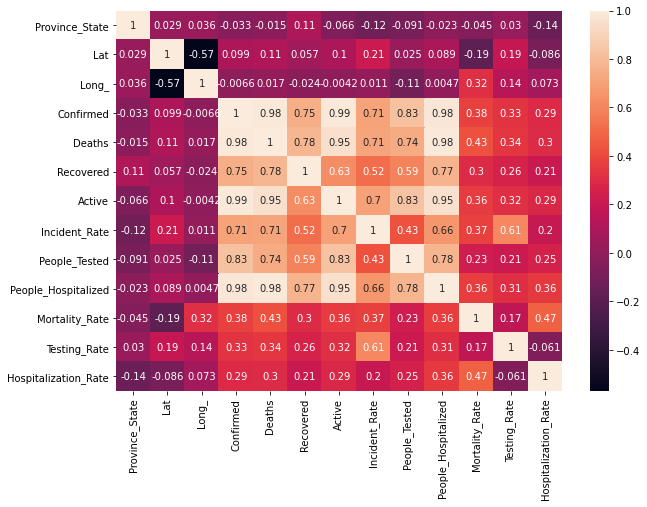

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(df_corr,annot=True)

Observation:

Confirmed, Recovered and Death cases are strongly correlated with each other as well as with Hospitalization Rate, Incident Rate, Testing Rate

# Checking Outliers

In [40]:
df.shape

(55, 13)

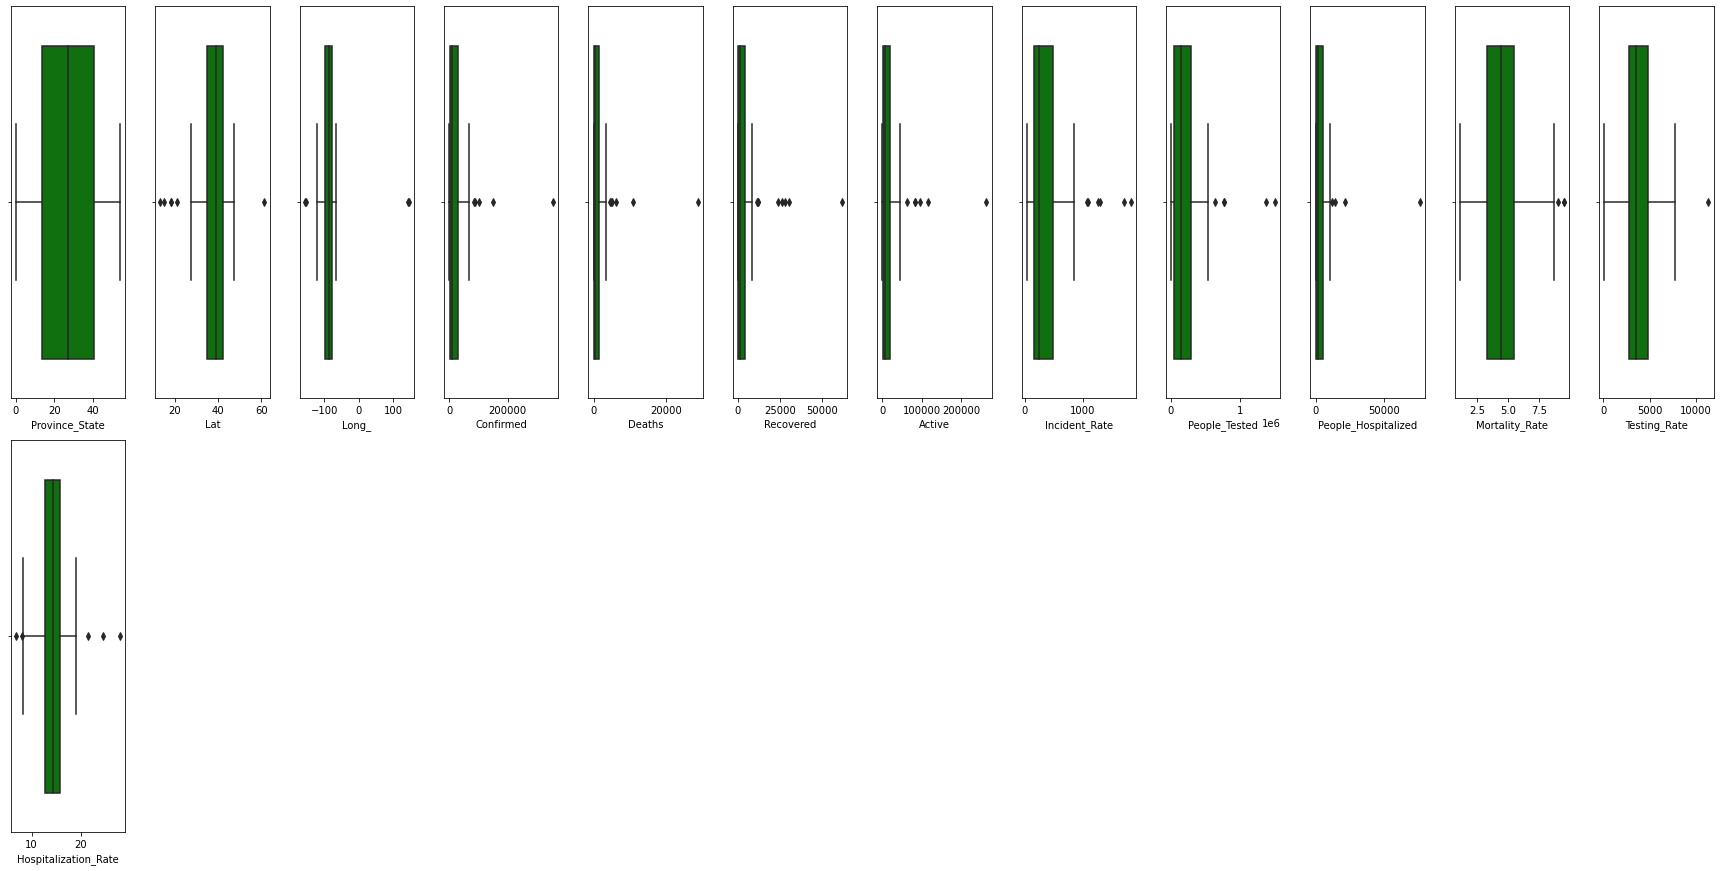

In [41]:
collist=df.columns.values
ncol=12
nrows=10

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

Observation:

There some outliers in every column.

# Removing Outliers

zscore Method

In [42]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

In [43]:
new_df

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,0.0,12530.0,266.194321,164450.0,1493,3.999387,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.0,39.0,54.815493,37045.0,57,2.493766,5063.940017,14.342541
3,2,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792,5.011405,2272.859351,12.022005
4,3,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535,2.138717,3189.670370,10.693584
6,5,39.0598,-105.3111,22797,1299,3478.0,18020.0,395.868121,131837.0,3955,5.698118,2289.339188,17.348774
8,7,39.3185,-75.5071,8194,310,3965.0,3919.0,841.476990,45412.0,1175,3.783256,4663.552976,14.342541
10,8,38.8974,-77.0268,7551,407,1059.0,6085.0,1069.927127,40419.0,1083,5.390015,5727.106946,14.342541
11,9,27.7663,-81.6868,47471,2096,0.0,45375.0,221.024217,771348.0,8934,4.415327,3591.383953,18.819911
12,10,33.0406,-83.6431,39801,1697,0.0,38104.0,374.864974,402940.0,7107,4.263712,3795.082856,17.856335
15,12,21.0943,-157.4983,643,17,578.0,48.0,45.413710,46304.0,82,2.643857,3270.352122,12.752722


In [44]:
df.shape

(55, 13)

In [45]:
new_df.shape

(48, 13)

Percentage of dataloss during removal of outliers using zscore method

In [46]:
P1=(55-48)*100/55
P1

12.727272727272727

12.72% is much high for removal of outliers. So Outliers wont be removed.

# Checking Skewness

In [47]:
df.skew()

Province_State          0.000000
Lat                    -0.914268
Long_                   3.783868
Confirmed               4.614978
Deaths                  5.361075
Recovered               3.556028
Active                  4.083998
Incident_Rate           1.955029
People_Tested           2.769517
People_Hospitalized     5.762119
Mortality_Rate          0.591921
Testing_Rate            1.452496
Hospitalization_Rate    0.845855
dtype: float64

There are so much skewness. But Target Variables has also high skewness. So no need to remove.

# Taking Recovered and Deaths as the target variables

In [49]:
x=df.drop(['Recovered','Deaths'],axis=1)
x

,Province_State,Lat,Long_,Confirmed,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,12530.0,266.194321,164450.0,1493,3.999387,3353.942386,11.438860
1,1,61.3707,-152.4044,401,39.0,54.815493,37045.0,57,2.493766,5063.940017,14.342541
3,2,33.7298,-111.4312,14906,10386.0,204.788838,165435.0,1792,5.011405,2272.859351,12.022005
4,3,34.9697,-92.3731,5003,1044.0,165.782801,96258.0,535,2.138717,3189.670370,10.693584
5,4,36.1162,-119.6816,85997,82500.0,217.646575,1380120.0,12334,4.066421,3492.893832,14.342541
6,5,39.0598,-105.3111,22797,18020.0,395.868121,131837.0,3955,5.698118,2289.339188,17.348774
7,6,41.5978,-72.7554,39017,29224.0,1094.357902,190718.0,10946,9.044775,5349.302875,28.054438
8,7,39.3185,-75.5071,8194,3919.0,841.476990,45412.0,1175,3.783256,4663.552976,14.342541
10,8,38.8974,-77.0268,7551,6085.0,1069.927127,40419.0,1083,5.390015,5727.106946,14.342541
11,9,27.7663,-81.6868,47471,45375.0,221.024217,771348.0,8934,4.415327,3591.383953,18.819911


# Scaling the Input Data

In [50]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x=pd.DataFrame(scaled_x)
scaled_x

,0,1,2,3,4,5,6,7,8,9,10
0,-1.700840,-0.650766,-0.066946,-0.285382,-0.206705,-0.343912,-0.220415,-0.294773,-0.276366,-0.325028,-7.542014e-01
1,-1.637846,2.817542,-1.420460,-0.523520,-0.505793,-0.873607,-0.649099,-0.429344,-1.008911,0.590625,-1.845562e-15
2,-1.574852,-0.482248,-0.573803,-0.250482,-0.258042,-0.497788,-0.217101,-0.266752,0.216022,-0.903916,-6.027356e-01
3,-1.511858,-0.334228,-0.179993,-0.436894,-0.481729,-0.595534,-0.449863,-0.384549,-1.181656,-0.412991,-9.477792e-01
4,-1.448864,-0.197358,-0.744287,1.087715,1.468674,-0.465568,3.869986,0.721167,-0.243751,-0.250624,-1.845562e-15
5,-1.385870,0.154051,-0.447339,-0.101944,-0.075252,-0.018962,-0.330149,-0.064052,0.550135,-0.895092,7.808379e-01
6,-1.322876,0.457039,0.225381,0.203376,0.193020,1.731387,-0.132031,0.591094,2.178418,0.743428,3.561524e+00
7,-1.259882,0.184935,0.168521,-0.376827,-0.412889,1.097692,-0.620946,-0.324573,-0.381522,0.376229,-1.845562e-15
8,-1.196887,0.134664,0.137118,-0.388931,-0.361026,1.670166,-0.637746,-0.333195,0.400230,0.945731,-1.845562e-15
9,-1.133893,-1.194175,0.040826,0.362512,0.579743,-0.457104,1.821633,0.402544,-0.073994,-0.197885,1.162951e+00


In [51]:
y=df.iloc[:,[4,5]]    #target variables
y

,Deaths,Recovered
0,522,0.0
1,10,352.0
3,747,3773.0
4,107,3852.0
5,3497,0.0
6,1299,3478.0
7,3529,6264.0
8,310,3965.0
10,407,1059.0
11,2096,0.0


# Target Variables are continous values. So the model will be a regression type.

# Finding Best Random State

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 74


# Multiple Algorithms

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=74)
model=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(train_x,train_y)
    m_y=m.predict(test_x)
    print("Score of Model",m,"is",m.score(train_x,train_y))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(test_y,m_y))
    print("Root Mean Squared Error", (mean_squared_error(test_y,m_y))**0.5 )
    print("r2_Score",r2_score(test_y,m_y))
    print("*******************************************************************")
    print("\n\n")

Score of Model LinearRegression() is 0.9913562780228258

Error
Mean Absolute Error 460.64778175872186
Root Mean Squared Error 626.8107077885215
r2_Score 0.9946512208923622
*******************************************************************



Score of Model KNeighborsRegressor() is 0.5811635870198866

Error
Mean Absolute Error 4690.158823529411
Root Mean Squared Error 11194.98710248055
r2_Score 0.09294560169133675
*******************************************************************



Score of Model RandomForestRegressor() is 0.8836721050019456

Error
Mean Absolute Error 4026.0967647058815
Root Mean Squared Error 9312.247690762357
r2_Score 0.33565325889781117
*******************************************************************



Score of Model Lasso() is 0.9913044376943225

Error
Mean Absolute Error 512.8354454403186
Root Mean Squared Error 764.2611302802003
r2_Score 0.9929211827012843
*******************************************************************



Score of Model Ridge() is 0.836

Linear Regression and Lasso has highest accuracy of 99.13%

# CROSS VALIDATION

We can finalize the model using cross validation

In [55]:
from sklearn.model_selection import cross_val_score
for m in model:
    mscores=cross_val_score(m,scaled_x,y,cv=5,)
    print("Scores of",m,"is",mscores)
    print("Mean Score of",m,"is",mscores.mean(),"\nStandard Deviation is",mscores.std())
    print("****************************************************************************\n\n")

Scores of LinearRegression() is [0.75658675 0.85917844 0.94548382 0.98809383 0.42226922]
Mean Score of LinearRegression() is 0.7943224150936764 
Standard Deviation is 0.2022132526020934
****************************************************************************


Scores of KNeighborsRegressor() is [-2.2875412   0.54056389  0.18750063  0.12998285  0.30974246]
Mean Score of KNeighborsRegressor() is -0.22395027491668457 
Standard Deviation is 1.041371967040312
****************************************************************************


Scores of RandomForestRegressor() is [-10.48768536   0.52755338   0.58491199   0.35075407  -0.73927962]
Mean Score of RandomForestRegressor() is -1.9527491082229447 
Standard Deviation is 4.294540630502272
****************************************************************************


Scores of Lasso() is [0.75580227 0.85790965 0.94536458 0.98504635 0.44651825]
Mean Score of Lasso() is 0.7981282198061376 
Standard Deviation is 0.19267164345878993
********

Linear Regression and Lasso has best accuracy of 79% using cross validation.

# L1 and L2 Regularization

To avoid overfitting and underfitting we can use Lasso, Ridge and ElasticNet

# Searching alpha value for best model using GridSearchCV

# Lasso Regression

In [57]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}

ls=Lasso()

rgr=GridSearchCV(ls,parameters)
rgr.fit(scaled_x,y)
print(rgr.score(scaled_x,y))

0.9950082418602345


In [58]:
print(rgr.best_params_)

{'alpha': 10}


In [59]:
lss=Lasso(alpha=10)
lss.fit(scaled_x,y)
lss_y=lss.predict(test_x)
print("Accuracy Score",r2_score(test_y,lss_y))
print("Mean Absolute Error", mean_absolute_error(test_y,lss_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,lss_y))**0.5 )

Accuracy Score 0.9966609695988227
Mean Absolute Error 344.5651483848162
Root Mean Squared Error 487.48617097471686


99.66% Accuracy from Lasso Regression. It is the best after hypertuning.

# Ridge Regression

In [60]:
rd=Ridge()
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clff=GridSearchCV(rd,parameters)
clff.fit(scaled_x,y)
clff.score(scaled_x,y)

0.9958112128173284

In [61]:
print(clff.best_params_)

{'alpha': 1e-05}


In [62]:
rdd=Ridge(alpha=0.00001)
rdd.fit(scaled_x,y)
rdd_y=rdd.predict(test_x)
print("Accuracy Score",r2_score(test_y,rdd_y))
print("Mean Absolute Error", mean_absolute_error(test_y,rdd_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,rdd_y))**0.5 )

Accuracy Score 0.9971466020451674
Mean Absolute Error 310.49017642721094
Root Mean Squared Error 457.8090176610256


99.71% Accuracy from Ridge Regression after Hypertuning.

# ElasticNet Regression

In [63]:
el=ElasticNet()
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clfff=GridSearchCV(el,parameters)
clfff.fit(scaled_x,y)
clfff.score(scaled_x,y)

0.9958111228893165

In [64]:
print(clfff.best_params_)

{'alpha': 1e-05}


In [65]:
eln=ElasticNet(alpha=0.00001)
eln.fit(scaled_x,y)
eln_y=eln.predict(test_x)
print("Accuracy Score",r2_score(test_y,eln_y))
print("Mean Absolute Error", mean_absolute_error(test_y,eln_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,eln_y))**0.5 )

Accuracy Score 0.9971474162306312
Mean Absolute Error 310.0858076438628
Root Mean Squared Error 457.5834009187815


99.71% Accuracy for ElasticNet after Hypertuning.

In [66]:
test_y

,Deaths,Recovered
53,1075,4523.0
25,6066,0.0
51,54,824.0
10,407,1059.0
19,393,8362.0
17,4525,0.0
15,17,578.0
23,73,1100.0
36,28636,61886.0
0,522,0.0


In [67]:
eln_y

array([[ 1.63971518e+03,  3.95848604e+03],
       [ 5.26897099e+03,  7.95365774e+02],
       [ 2.00128910e+02,  6.79728147e+02],
       [ 4.56351981e+02,  1.01667110e+03],
       [ 6.71064342e+02,  8.08006297e+03],
       [ 5.88048368e+03, -1.35559238e+03],
       [-2.91006011e+02,  8.83535350e+02],
       [ 6.31269574e+01,  1.11026406e+03],
       [ 2.85006650e+04,  6.20239890e+04],
       [ 5.42299364e+02, -1.93105379e+01],
       [ 8.17852751e+02,  1.15407713e+04],
       [ 9.49830022e+01,  2.06712771e+03],
       [ 1.58491542e+03,  3.19135328e+03],
       [ 4.64975081e+02,  7.74201552e+03],
       [-2.07525178e+01,  3.21648797e+03],
       [ 5.09292828e+02, -4.94058881e+02],
       [-2.23018617e+01,  3.97879935e+03]])

# Conclusion

The best Accuracy is at Lasso Regressor having 99.66%.

# Saving Model

In [68]:
import pickle

filename='Covid_19_US_lss.pkl'
pickle.dump(lss,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(test_x)

array([[ 1.75065030e+03,  3.86322258e+03],
       [ 5.36615833e+03,  6.47225683e+02],
       [ 2.26772991e+02,  7.98222499e+02],
       [ 6.04768803e+02,  1.29475907e+03],
       [ 5.73547626e+02,  7.87038249e+03],
       [ 6.03356166e+03, -1.40461724e+03],
       [-4.04895552e+02,  8.76145898e+02],
       [ 3.90253637e+01,  1.16414650e+03],
       [ 2.83732346e+04,  6.23225858e+04],
       [ 5.29712987e+02,  8.31213193e+01],
       [ 7.14455769e+02,  1.13001709e+04],
       [ 2.46165026e+01,  1.97984358e+03],
       [ 1.54612080e+03,  3.18485832e+03],
       [ 4.52408442e+02,  7.58583940e+03],
       [-1.13524047e+02,  2.89593882e+03],
       [ 4.95164394e+02, -4.14264555e+02],
       [-1.37165827e+02,  3.91927687e+03]])